### Machine Learning for Systems & Control 5SC28 2023-2024

# Exercise Set Lecture 1: ML basics in Python

## Table of contents

1. <a href="#Exercise-1:-Linear-Regression">Exercise 1: Linear Regression</a>
2. <a href="#Exercise-2:-Linear-Regression-using-sklearn">Exercise 2: Linear Regression using sklearn</a>
3. <a href="#Exercise-3:-Polynomial-Regression-and-Regularization-by-Train,-Validation-and-Test-Splitting.">Exercise 3: Polynomial Regression and Regularization by Train, Validation and Test Splitting.</a>
4. <a href="#Exercise-4:-Dynamical-Systems-Modelling-using-Polynomial-NARX">Exercise 4: Dynamical Systems modelling using Polynomial NARX</a>
5. <a href="#(Optional)-Exercise-5:-Estimating-a-Poly-NARX-Model-of-a-State-Space-System.">(Optional) Exercise 5: Estimating a Poly-NARX Model of a State-Space System.</a>
6. <a href="#(Optional)-Exercise-6:-Design-Assignment-Environment.">(Optional) Exercise 6: Design Assignment Environment.</a>


This exercise set is designed to be completed after reviewing the introductory Python notebook.

Throughout this exercise set, we'll cover the fundamentals of machine learning in Python and demonstrate some key concepts.

## Exercise 1: Linear Regression

One of the simplest models to estimate is a linear model represented by the equation:

$$
Y = X \beta + \epsilon
$$

Here, $Y$ represents the observed output, $X$ is the system input, $\beta$ is the parameter vector that needs to be estimated, and $\epsilon$ denotes an unknown zero-mean noise with finite variance.

This modeling approach is known as linear regression, commonly implemented using [Linear Least Sqaures](https://en.wikipedia.org/wiki/Ordinary_least_squares). Linear least squares aims to solve the following overdetermined system of equations

$$
X \beta = Y \\
$$
This can be solved using the following projection steps
$$
X^T X \beta = X^T Y\\
 \beta = (X^T X)^{-1} X^T Y
$$


**a)** Write a linear data generating function `f0` which generates output data $Y$ (`Ydata`) for the given $X$ (`Xdata`) and $\beta_0=(0.5,-0.9)$ (`beta0`). Also note that `f0` includes an argument for the amount of noise which will be added to the output. 

*tip: use np.dot or the matrix multiply `@` operator*

**b)** Make a scatter plot with both inputs as (x1,y) and (x2,y).

*tip: use the format `plt.plot(x,y,'.')`*

**c)** Estimate $\beta$ using Linear Least Squares as seen above and compare to $\beta_0$. Why is there a difference?

*tip: Avoid using `np.linalg.inv`; instead, use `np.linalg.solve` , which is generally much faster.*

*tip: To transpose an array, you can either use `a.T` or `np.transpose(a)`. Additionally, use `@` for matrix multiplication*

**Answer c):** The measurements $Y$ contain some level of random variation, known as noise. When we estimate the model parameters, this noise influences the results, making the estimated parameters themselves random variables. Essentially, the noise in the data causes uncertainty in our estimates. Consequently, the estimated model parameters $\beta$ may not perfectly match the true system parameters, $\beta_0$. In essence, this difference between the estimated and true parameters is due to the variability introduced by the noise in the data, which affects the accuracy of our estimation process.

**d)** Use the estimated $\beta$ to make a residual plot which plots both `y` and `y - y_pred` where `y_pred` is the predicted output using the estimated $\beta$.

*tip: you can reuse `f0` by setting noise_scale to zero*

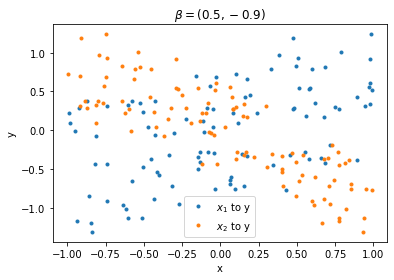

beta predicted= [ 0.54903969 -0.90412248]
     beta real= [ 0.5 -0.9]


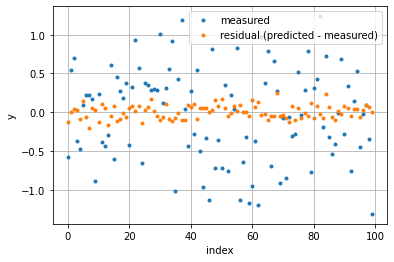

In [1]:
import numpy as np

def f0(x, beta, noise_scale=0.1):
    y = x@beta #a=)
    return y + np.random.normal(scale=noise_scale, size=x.shape[0])  #add some noise of scale noise_scale

beta0 = np.array([0.5,-0.9])
Nsamps = 100
Xdata = np.random.uniform(low=-1,high=1,size=(Nsamps, beta0.shape[0]))
Ydata = f0(Xdata, beta=beta0) #a=)

from matplotlib import pyplot as plt
plt.title(r'$\beta = (0.5,-0.9)$') #b)
plt.plot(Xdata[:,0], Ydata,'.',label='$x_1$ to y') #b)
plt.plot(Xdata[:,1], Ydata,'.',label='$x_2$ to y') #b)
plt.xlabel('x'); plt.ylabel('y'); plt.legend() #b)
plt.show() #b)

beta_p = np.linalg.solve(Xdata.T@Xdata, Xdata.T@Ydata) #c=)
print('beta predicted=', beta_p) #c)
print('     beta real=', beta0) #c)

Ypred = f0(Xdata, beta=beta_p, noise_scale=0) #d)
plt.plot(Ydata,'.',label='measured') #d)
plt.plot(Ypred-Ydata,'.',label='residual (predicted - measured)') #d)
plt.xlabel('index'); plt.ylabel('y'); plt.legend() #d)
plt.grid() #d)
plt.show() #d)

## Exercise 2: Linear Regression using sklearn

Using [sklearn](https://scikit-learn.org/stable/) simplifies model estimation and minimizes coding errors. It covers a wide range of machine learning techniques, including basic algorithms and some deep learning methods.


**a)** run the cell and compare the results with the last exercise.

**b)** compute the residuals by using `reg.predict` and calculate the root mean square error (RMS) and the Normalized RMS (NRMS) which are defined as follows

$$
\text{RMS} = \sqrt{\frac{1}{N} \sum_{i=0}^{N-1} (\hat{y}_i - y_i)^2} \\
\text{NRMS} = \frac{\text{RMS}}{\sigma_y} \\
\sigma_y = \sqrt{\frac{1}{N} \sum_{i=0}^{N-1} (\bar{y} - y_i)^2} \\
\bar{y} = \frac{1}{N} \sum_{i=0}^{N-1} y_i
$$

 where $\hat{y}_i$ represents the $i$-th predicted output, $y_i$ is the measured output, $\sigma_y$ denotes the standard deviation, and $\bar{y}$ signifies the average value.
 
*tip: use `np.mean` and `np.std`*

**c)** If the NRMS were 1, what would that indicate about the model?

**Answer c):** It implies that the model's performance is equivalent to a simplistic model that predicts only the average value. Substituting $\hat{y}_i$ with $\bar{y}$ would yield an NRMS of 1, indicating no improvement beyond predicting the average.

**d)** Make a residual plot like in **1d)**.

beta predicted= [ 0.47378029 -0.88879179]
     beta real= [ 0.5 -0.9]
RMS= 0.09317717332118505
NRMS= 0.1565947665405086


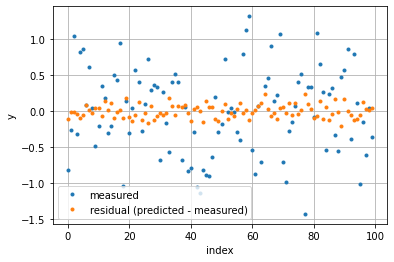

In [ ]:

def f0(x, beta=np.pi, noise_scale=0.1):
    y = x@beta
    return y + np.random.normal(scale=noise_scale, size=x.shape[0])

#generate data
beta0 = np.array([0.5,-0.9])
Nsamps = 100
Xdata = np.random.uniform(low=-1,high=1,size=(Nsamps,beta0.shape[0]))
Ydata = f0(Xdata,beta=beta0) 

#fit the data
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(Xdata,Ydata)

#print resulting fit
print('beta predicted=',reg.coef_)
print('     beta real=',beta0)

Ypred = reg.predict(Xdata) #b)

RMS = np.mean((Ypred - Ydata)**2)**0.5 #b)
NRMS = RMS/np.std(Ydata) #b)

print('RMS=', RMS) #b)
print('NRMS=', NRMS) #b)

plt.plot(Ydata,'.',label='measured') #d)
plt.plot(Ypred-Ydata,'.',label='residual (predicted - measured)') #d)
plt.xlabel('index'); plt.ylabel('y'); plt.legend(); plt.grid() #d)
plt.show() #d)

## Exercise 3: Polynomial Regression and Regularization by Train, Validation and Test Splitting.


When employing any data-driven approach, it's crucial to take into account the risk of overfitting. As demonstrated in this exercise, the model with the lowest Root Mean Square Error (RMSE) on the training data may also end up being one of the poorest-performing models.

We will fit a sine function with some measurement noise $\epsilon$

$$
 y = \sin(10 x) + \epsilon
$$

using a polynomial model of increasing degree $d$. 

$$
 \hat{y} = a_0 + a_1 x + a_2 x^2 + ... + a_d x^d
$$

**a)** Inspect and run the code.

**b)** Why does the RMS train decrease as the polynomial degree increases?

**Answer b):** When using a higher-order polynomial, the model has more parameters (i.e., degrees of freedom), allowing it to fit the training data more closely, including the noise. This increased flexibility often leads to a better fit to the noisy training data, resulting in a lower RMS training error.

**c)** The model of degree 25 has the lowest RMS on the training data. Why should it not be used on unseen validation or test data? 

**Answer c):** The estimated polynomial oscilates strongly as it tries to stay as close as possible to the noisy measurements. It starts to model the noise disturbance on each of the individual samples instead of modelling the underlying data-generating system.

**d)** Which degree would you choose to achieve the best model?

**Answer d):** Around degree 11, the fluctuations are relatively small, and the fit is accurate.

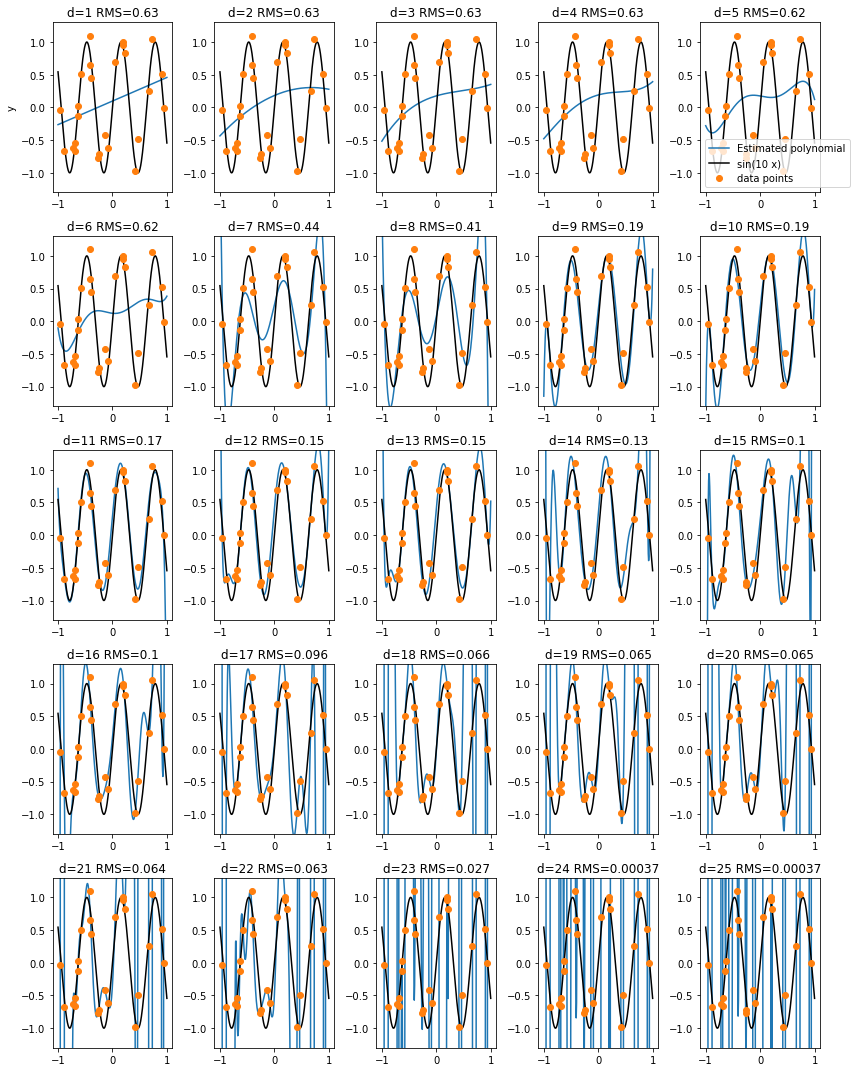

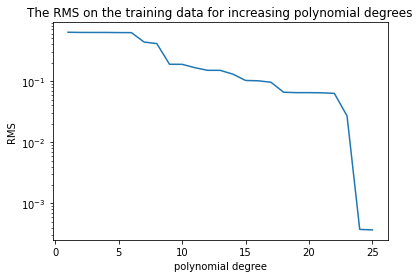

In [3]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

#data generation
def f0(x):
    return np.sum(np.sin(x*10),axis=1)
np.random.seed(42)
Nsamples = 25
Xfull = np.random.uniform(low=-1,high=1,size=(Nsamples,1)) 
Yfull = f0(Xfull) + np.random.normal(scale=0.2,size=Xfull.shape[0]) 

Xtest = np.linspace(-1,1,num=300)[:,None]
Ytest = f0(Xtest)

#increase degree
degrees = list(range(1,Nsamples+1,1))
errors = []
plt.figure(figsize=(12,np.ceil(len(degrees)/5)*3))
for i,degree in enumerate(degrees):
    #model 
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                  ('linear', LinearRegression())])
    model.fit(Xfull,Yfull)
    
    
    #calculating RMS and saving
    p = lambda x: model.predict(x)
    error = np.mean((p(Xfull)-Yfull)**2)**0.5
    errors.append(error)
    
    #plotting
    plt.subplot(int(np.ceil(len(degrees)/5)), 5, i+1)
    plt.title('d='+str(degree)+f' RMS={error:.2}')
    plt.plot(Xtest, p(Xtest),label='Estimated polynomial')
    plt.ylim(-1.3,1.3)
    plt.plot(Xtest, Ytest,'k',label='sin(10 x)')
    plt.plot(Xfull,Yfull,'o',label='data points')
    if i==4:
        plt.legend()
    if i==0:
        plt.ylabel('y')
    plt.tight_layout()
plt.show()    
plt.semilogy(degrees,errors)
plt.title('The RMS on the training data for increasing polynomial degrees')
plt.xlabel('polynomial degree')
plt.ylabel('RMS')
plt.show()

Manually selecting the polynomial degree (i.e. model complexity) is not quantitative nor automatic. To solve this we can introduce validation data sets. The general idea is 
 
 1. Split off a part of the training data (randomly) into a separate validation data set.
 2. Train the model using the remaining training data, excluding the validation set.
 3. Assess the model's performance by calculating the RMSE (or an equivalent metric) on the validation set, providing a measure of its generalization capability.
 4. Pick the polynomial degree with the lowest RMSE on the validation set.
 
Let's apply this methodology on picking the polynomial degree. 
 
**e)** Split the data into a dedicated training and validation set for the given fraction `val_frac`. (Use `Xfull` and `Yfull` from the previous cell and split it into `Xtrain`, `Ytrain`, `Xval` and `Yval`). Run the cell and observe the behaviour of the RMSE during training and validation for an increasing polynomial degree.

**f)** pick and print the degree with the lowest validation RMSE. (use the list of RMS val `errors_val`)

*tip: use np.argmin*

**g)** Could you link these concepts to the variance-bias trade-off discussed in the lecture?

additional information: These are the basics of model complexity selection using a validation set. However, there are more advanced methods available such as k-fold cross-validation [Example](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

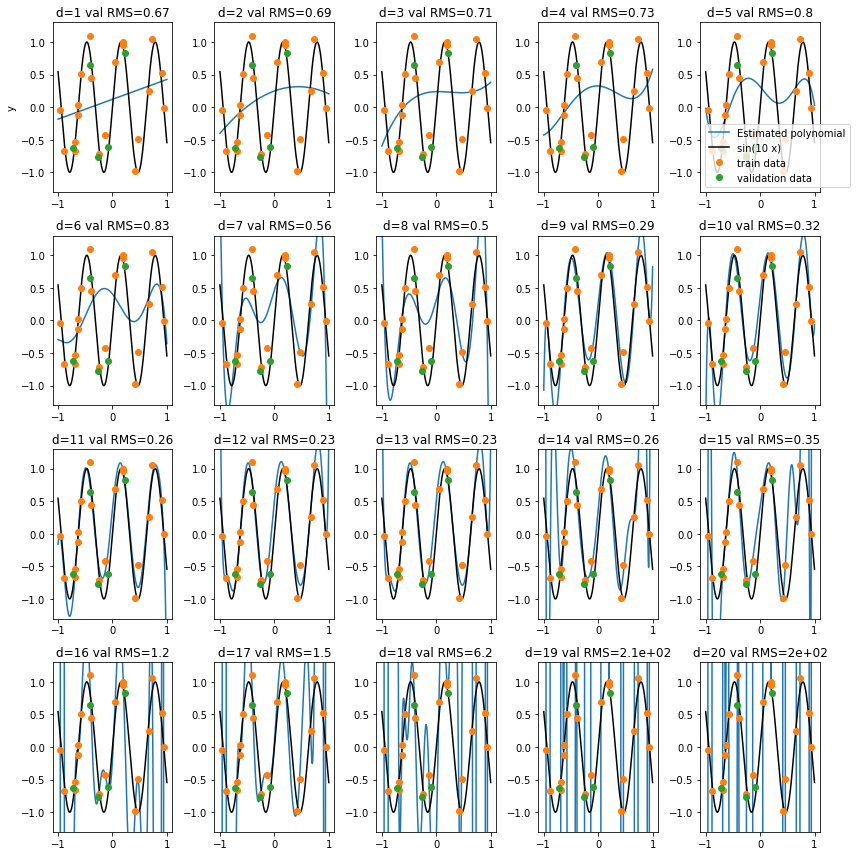

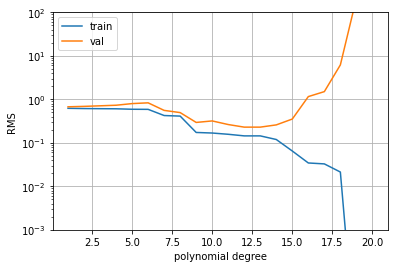

best degree= 12


In [4]:
val_frac = 0.2
pivit = int((1-val_frac)*Xfull.shape[0]) #e)
#The data is already suffeld randomlly so we don't have to do it again #e)
Xtrain = Xfull[:pivit] #e=)
Xval   = Xfull[pivit:] #e=)
Ytrain = Yfull[:pivit] #e=)
Yval   = Yfull[pivit:] #e=)

Xtest = np.linspace(-1,1,num=300)[:,None]
Ytest = f0(Xtest)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

degrees = list(range(1,Xtrain.shape[0]+1,1))
errors_val = []
errors_train = []
models = []
plt.figure(figsize=(12,np.ceil(len(degrees)/5)*3))
for i,degree in enumerate(degrees):
    
    #model construction and estimation
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                  ('linear', LinearRegression(fit_intercept=False))])
    model.fit(Xtrain,Ytrain)
    models.append(model)

    #errors
    error_val_now = np.mean((model.predict(Xval)-Yval)**2)**0.5
    error_train_now = np.mean((model.predict(Xtrain)-Ytrain)**2)**0.5
    errors_val.append(error_val_now)
    errors_train.append(error_train_now)
    
    #plotting    
    plt.subplot(int(np.ceil(len(degrees)/5)), 5, i+1)
    plt.title('d='+str(degree)+f' val RMS={error_val_now:.2}')
    plt.plot(Xtest, p(Xtest),label='Estimated polynomial')
    plt.ylim(-1.3,1.3)
    plt.plot(Xtest, Ytest,'k',label='sin(10 x)')
    plt.plot(Xtrain,Ytrain,'o',label='train data')
    plt.plot(Xval,Yval,'o',label='validation data')
    if i==4:
        plt.legend()
    if i==0:
        plt.ylabel('y')
    plt.tight_layout()

plt.show()    
plt.semilogy(degrees,errors_train,label='train')
plt.semilogy(degrees,errors_val,label='val')
plt.ylim(1e-3,1e2)
plt.xlabel('polynomial degree')
plt.ylabel('RMS')
plt.legend()
plt.grid()
plt.show()

print('best degree=',degrees[np.argmin(errors_val)]) #f)
best_model = models[np.argmin(errors_val)] #f)

## Exercise 4: Dynamical Systems Modelling using Polynomial NARX

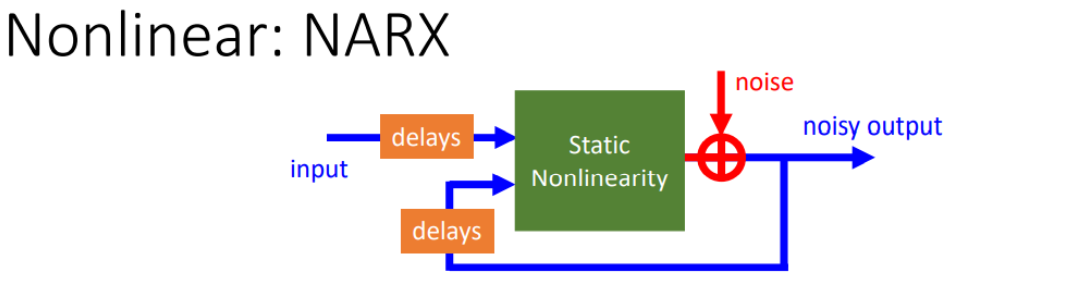


Nonlinear dynamical systems can be modeled using the NARX model class. Here you will estimate a polynomial NARX model. 

The NARX model structure is given by:

$$
y_k = f(u_{k-1},u_{k-2},...,u_{k-n_b},y_{k-1},y_{k-2},...,y_{k-n_a}) + e_k
$$

where $u_k$ is the input, $y_k$ the measured output, and $e_k$ the zero-mean white noise at time instant $k$. Sometimes $u_k$ is included in $f$ but in this case we have left it out as the considered system does not have a direct feedthrough term. The considered system is given by:

$$
y_k = \left (0.8 - 0.5 \exp \left ( -y_{k-1}^2 \right ) \right ) y_{k-1} - \left  (0.3 + 0.9 \exp \left ( -y_{k-1}^2\right )\right ) y_{k-2} + u_{k-1} + 0.2 u_{k-2} + 0.1 u_{k-1} u_{k-2} + e_k
$$


**a)** Complete the `get_NARX_data` function for a given function $f$ where the past arrays are continuously updated.

*tip: write down the model structure on a piece of paper before you start implementing the equations*

**b)** To estimate a model of this system you need to organize the data structure in the form we have used before: `Xdata.shape = (Nsamp, Nfeatures)` and `Ydata = (Nsamp)` where each row of `Xdata` is given by $(u_{k-2} \ u_{k-1} \ y_{k-2} \ y_{k-1})$ for $n_a=2$ and $n_b=2$ and the elements of `Ydata` are simply $y_k$. Construct the input and output arrays required for training. 


*tip: use np.concatenate and .append*

**c)** Split the data into train and validation 

*tip: use train_test_split provided by sklearn*

In [5]:
import numpy as np
from matplotlib import pyplot as plt
def f(upast,ypast):
    ukm2, ukm1 = upast
    ykm2, ykm1 = ypast
    ystar = (0.8 - 0.5 * np.exp(-ykm1 ** 2)) * ykm1 - (0.3 + 0.9 * np.exp(-ykm1 ** 2)) * ykm2 \
           + ukm1 + 0.2 * ukm2 + 0.1 * ukm1 * ukm2
    return ystar + np.random.normal(scale=0.01)

#make data sequence a)
def get_NARX_data(ulist, f, na, nb):
    # iteratively uses the given f to find the new output.
    
    # init upast and ypast as lists.
    upast = [0]*nb #a=)
    ypast = [0]*na #a=)
    
    ylist = []
    for unow in ulist:
        #compute the current y given by f
        ynow = f(upast,ypast) #a=)
        
        #update past arrays
        upast.append(unow) #add an element on the end
        upast.pop(0)       #remove the fist element
        ypast.append(ynow)
        ypast.pop(0)
        
        #save result
        ylist.append(ynow)
    return np.array(ylist) #return result

na, nb = 2, 2

np.random.seed(42)
ulist = np.random.normal(scale=1,size=1000)
ylist = get_NARX_data(ulist,f,na,nb)

#construct training data in correct form b)
def make_training_data(ulist,ylist,na,nb):
    #Xdata = (Nsamples,Nfeatures)
    #Ydata = (Nsamples)
    Xdata = []
    Ydata = []
    
    #for loop over the data:
    for k in range(max(na,nb),len(ulist)): #skip the first few indexes such to not get indexing errors
        Xdata.append(np.concatenate([ulist[k-nb:k],ylist[k-na:k]])) #b)
        Ydata.append(ylist[k]) #b)
    return np.array(Xdata), np.array(Ydata)

Xdata, Ydata = make_training_data(ulist,ylist, 2, 2)

#split data c)
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(Xdata, Ydata) #c)

**d)** Find the model with the lowest validation RMSE for an increasing polynomial degree ranging from 1 to 5. Print the NRMS of the model with the lowest NRMS validation error.

*tip: copy code from the last exercise*

**e)**  Make a residual plot.

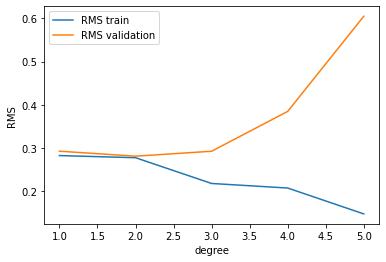

NRMS val one step: 0.2808125181200239
degree= 2


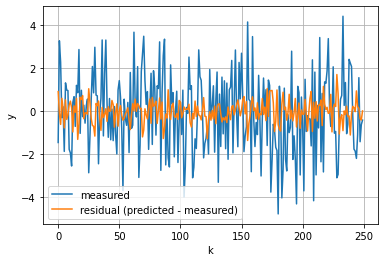

In [6]:
#model construction
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression

degrees = [1,2,3,4,5] #d)
errors_val = [] #d)
errors_train = [] #d)
models = [] #d)
for i,degree in enumerate(degrees): #d)
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)), #d)
                  ('linear', LinearRegression(fit_intercept=True))]) #d)
    model.fit(Xtrain,Ytrain) #d)
    models.append(model) #d)
    p = lambda x: model.predict(x) #d)
    error_val = np.mean((p(Xval)-Yval)**2)**0.5/np.std(Yval) #d)
    error_train = np.mean((p(Xtrain)-Ytrain)**2)**0.5/np.std(Ytrain) #d)
    errors_val.append(error_val) #d)
    errors_train.append(error_train) #d)


plt.plot(degrees,errors_train) #d)
plt.plot(degrees,errors_val) #d)
plt.xlabel('degree') #d)
plt.ylabel('RMS') #d)
plt.legend(['RMS train','RMS validation']) #d)
plt.show() #d)
print('NRMS val one step:',min(errors_val)) #d)
print('degree=',degrees[np.argmin(errors_val)]) #d)
best_model = models[np.argmin(errors_val)] #d)

plt.plot(Yval,'-',label='measured') #e)
plt.plot(best_model.predict(Xval)-Yval,'-',label='residual (predicted - measured)') #e)
plt.xlabel('k'); plt.ylabel('y'); plt.legend(); plt.grid() #e)
plt.show() #e)

**f)** Perform a simulation analysis using the estimated model (i.e. re-use the model to the next step with the prediction from the last step). Compare the NRMS simulation to the NRMS one-step-ahead obtained from **e)**. Additionally, create a residual plot.

**g)** Why is the NRMS one-step-ahead error lower than the NRMS simulation error?

**Answer g):** The NRMS one-step-ahead error is often lower than the NRMS simulation error because the optimization process typically focuses on minimizing the error for immediate (i.e. one-step-ahead) predictions. 

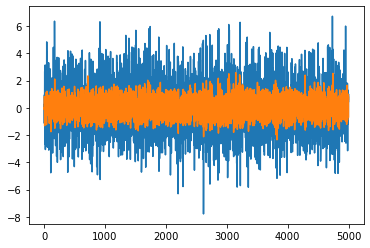

NRMS= 0.3669665949186192


In [ ]:

np.random.seed(43)
utest = np.random.normal(scale=1.0,size=5000)
ytest = get_NARX_data(utest,f,na,nb)

model_now = best_model #f=)
fmodel = lambda u,y: model_now.predict(np.concatenate([u,y])[None,:])[0] #convert u and y to be in the correct shape for .predict
ytest_sim = get_NARX_data(utest, fmodel, na, nb)
plt.plot(ytest) #f)
plt.plot(ytest-ytest_sim) #f)
plt.show() #f)

print('NRMS=',np.mean((ytest-ytest_sim)**2)**0.5/np.std(ytest)) #f)


## (Optional) Exercise 5: Estimating a Poly-NARX Model of a State-Space System.

You can also apply a NARX model to systems that don't inherently match a NARX structure. In this context, we'll explore the modeling process for fitting a polynomial NARX model to a system described by state-space equations.

The system we intend to model is characterized by the following equations:

$$
x_{t+1}^{(1)} = \frac{x_t^{(1)}}{1.2+x_t^{(2)}} + 0.4 x_t^{(2)}\\
x_{t+1}^{(2)} = -\frac{x_t^{(2)}}{1.2+x_t^{(1)}} + 0.4 x_t^{(1)} + u_t\\
y_t = x_t^{(1)} + \epsilon_t
$$
where $\epsilon_t$ is the measurement noise. Here we have the Outpur Error (OE) model structure.


**a)** In the previous exercise, we were aware of the optimal values for $n_a$ and $n_b$ because they were inherent in the NARX system we had designed. However, in this case, since the system is in a state-space form, we don't have prior knowledge of the optimal $n_a$ and $n_b$ values for our model. Therefore, we'll select $n_a$ and $n_b$ similar to how we choose the degree of a polynomial on a validation dataset, using a grid search approach.
To perform this grid search, we need to estimate the bounds within which the computer will scan for suitable values of $n_a$ and $n_b$.

**Answer a):** We know that we have 2 states, hence, $n_a+n_b \geq 2$. Furthermore, the system is not too complex so we might start with a initial bound $n_a \leq 5$ and $n_b \leq 5$. We need to validated this choice at a later stage. 

**b)** Perform a grid search over $n_a$, $n_b$ and the polynomial degree. After fitting, use the validation set to compute the validation prediction error and save the model and model settings if a new lowest validation prediction error has been achieved. 

*tip: use three for loops for the grid search*

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def f(x,u):
    x1, x2 = x
    x1new = x1/(1.2+x2**2) + 0.4*x2
    x2new =-x2/(1.2+x1**2) + 0.4*x1 + u
    return [x1new, x2new]

def h(x):
    return x[0] + 0.5760551625914079*1e-2*np.random.normal() #OE noise so not NARX noise!, model error will occure

def apply_experiment(ulist,f,h):
    x = [0,0]
    ylist = []
    for u in ulist:
        ylist.append(h(x))
        x = f(x,u)
    return ylist

np.random.seed(42)

#train
utrain = np.random.normal(size=3000)
ytrain = apply_experiment(utrain,f,h)

#val
uval = np.random.normal(size=3000)
yval = apply_experiment(uval,f,h)

#test
utest = np.random.normal(size=1000)
ytest = apply_experiment(utest,f,h)


def make_training_data(ulist,ylist,na,nb):
    #Xdata = (Nsamples,Nfeatures)
    #Ydata = (Nsamples)
    Xdata = []
    Ydata = []
    
    #for loop over the data:
    for k in range(max(na,nb), len(ulist)): #skip the first few indexes such to not get indexing errors
        Xdata.append(np.concatenate([ulist[k-nb:k],ylist[k-na:k]])) #b)
        Ydata.append(ylist[k]) #b)
    return np.array(Xdata), np.array(Ydata)

best_NRMS = float('inf')
best_model = None
best_settings = None
prediction_val = True #True will use prediction (one-step-ahead as validation measure, otherwise it will be simulation)

for na in [0,1,2,3,4,5]: #b)
    for nb in [0,1,2,3,4,5]: #b)
        if na+nb<2: #b)
            continue #b)
        Xtrain, Ytrain = make_training_data(utrain, ytrain, na, nb)
        Xval, Yval     = make_training_data(uval  , yval  , na, nb)
        for degree in range(1,5): #b)
            model = Pipeline([('poly', PolynomialFeatures(degree=degree)), #b)
                          ('linear', LinearRegression(fit_intercept=True))]) #b)
            model.fit(Xtrain,Ytrain) #b)
            
            if prediction_val: # validation using prediction error on the validation set.
                Yval_pred = model.predict(Xval) #b=)
                error_val = np.mean((Yval_pred-Yval)**2)**0.5/np.std(Yval) #b=)
            else: # simulation on validation set
                F = lambda u,y: model.predict(np.concatenate([u,y])[None,:])[0] 
                try:
                    pass
                    yval_sim = get_NARX_data(uval, F, na, nb) #d)
                    error_val = np.mean((yval_sim-yval)**2)**0.5/np.std(yval) #d)
                except ValueError: #if it explodes it will give a ValueError and will set error_val to infinity
                    error_val = float('inf')
            
            print(f'NRMS val={error_val:.5f} na={na} nb={nb} degree={degree} ')
            if error_val < best_NRMS:
                best_NRMS = error_val #b=)
                best_model = model #b=)
                best_settings = {'na': na, 'nb': nb, 'degree': degree}

print('best_NRMS', best_NRMS)
print('best settings', best_settings)

NRMS val=0.58274 na=0 nb=2 degree=1 
NRMS val=0.58320 na=0 nb=2 degree=2 
NRMS val=0.58313 na=0 nb=2 degree=3 
NRMS val=0.58334 na=0 nb=2 degree=4 
NRMS val=0.55214 na=0 nb=3 degree=1 
NRMS val=0.55285 na=0 nb=3 degree=2 
NRMS val=0.54843 na=0 nb=3 degree=3 
NRMS val=0.55304 na=0 nb=3 degree=4 
NRMS val=0.43334 na=0 nb=4 degree=1 
NRMS val=0.43402 na=0 nb=4 degree=2 
NRMS val=0.40218 na=0 nb=4 degree=3 
NRMS val=0.40736 na=0 nb=4 degree=4 
NRMS val=0.41508 na=0 nb=5 degree=1 
NRMS val=0.41711 na=0 nb=5 degree=2 
NRMS val=0.36657 na=0 nb=5 degree=3 
NRMS val=0.37411 na=0 nb=5 degree=4 
NRMS val=0.96682 na=1 nb=1 degree=1 
NRMS val=0.96713 na=1 nb=1 degree=2 
NRMS val=0.96554 na=1 nb=1 degree=3 
NRMS val=0.96737 na=1 nb=1 degree=4 
NRMS val=0.52112 na=1 nb=2 degree=1 
NRMS val=0.52156 na=1 nb=2 degree=2 
NRMS val=0.50217 na=1 nb=2 degree=3 
NRMS val=0.50250 na=1 nb=2 degree=4 
NRMS val=0.52006 na=1 nb=3 degree=1 
NRMS val=0.52152 na=1 nb=3 degree=2 
NRMS val=0.48952 na=1 nb=3 degree=3 
N

**c)** Run the block below and check the prediction and simulation error. Why does the simulation using the best (prediction) model result in an infinite error?

**Answer c):** Because the NARX polyonomial model is estimated using a 1-step ahead prediction minimizer. We also use the 1-step ahead prediction criterion during validation. Such models do not always generalize well towards simulation tasks. 

**d)** Go back to the previous cell and change the validation loop from prediction error to simulation error. Check if this results in a estimated model which is stable and more accurate in simulation on the validation and test dataset using the cell below.

In [9]:
model_now = best_model
Xtest, Ytest = make_training_data(utest, ytest, best_settings['na'], best_settings['nb'])
Ytest_pred = model_now.predict(Xtest)
print('NRMS test prediction:', np.mean((Ytest-Ytest_pred)**2)**0.5/np.std(ytest))

try:
    ytest_sim = get_NARX_data(utest,lambda u,y: model_now.predict(np.concatenate([u,y])[None,:])[0], \
                              best_settings['na'], best_settings['nb']) #explodes
    NRMS_sim = np.mean((ytest-ytest_sim)**2)**0.5/np.std(ytest)
    plt.plot(ytest)
    plt.plot(ytest-ytest_sim)
    plt.show()
except ValueError:
    NRMS_sim = float('inf')
print('NRMS test simulation:', NRMS_sim)

NRMS test prediction: 0.1540168318315691
NRMS test simulation: inf


## (Optional) Exercise 6: Design Assignment Environment.

**a)** Install the design environment of the unbalanced disk. (see intructions below)

**b)** Test the environment using the visual

*note: $-4 \leq u \leq 4$*

 Note
if you haven't already installed git, follow these steps:
 1. Open Anaconda Navigator and launch "cmd.exe".
 2. Type `conda install -c anaconda git` in the command prompt.
Once git is installed, you can proceed to install the environment from the notebook.


In [1]:
!pip install git+https://github.com/GerbenBeintema/gym-unbalanced-disk@master
# in case of error try installing pyglet 
# !pip install pyglet

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/GerbenBeintema/gym-unbalanced-disk (to revision master) to c:\users\20215400\appdata\local\temp\pip-req-build-sxi0bjhq
  Resolved https://github.com/GerbenBeintema/gym-unbalanced-disk to commit 6a1f36fdaa6965daacb9ecc0ed5e00b12f5e31bb
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/GerbenBeintema/gym-unbalanced-disk 'C:\Users\20215400\AppData\Local\Temp\pip-req-build-sxi0bjhq'


In [2]:
import gymnasium as gym
import time
import gym_unbalanced_disk #is required
import numpy as np
env = gym.make('unbalanced-disk-v0',dt=0.05) #if this fails restart the kernel or use gym_unbalanced_disk.UnbalancedDisk
#env = gym_unbalanced_disk.UnbalancedDisk(dt=0.05)

In [4]:
#if you had error just run this cell again
observation, info = env.reset()
try:
    for i in range(200):
        u = env.action_space.sample() #random input
        observation, reward, terminated, truncated, info = env.step(u) 
        print(observation, reward)
        env.render()
        time.sleep(1/24)
        if terminated or truncated:
            observation, info = env.reset()
finally: #this will always run such to close the visualization
    env.close()

[-0.02859874 -1.11522733] 3.526678598267156e-11
[-0.04789784  0.21439452] 4.77365870704151e-11
[-0.04847117 -0.06887639] 4.744753150735039e-11
[0.03063382 2.98441416] 3.585881553947501e-11
[ 0.10510237 -0.00448559] 1.136385504149188e-10
[ 0.09221543 -0.4793965 ] 9.389289056162281e-11
[ 0.02858545 -1.97860102] 3.5489906055792346e-11
[-0.00257512  0.65895159] 2.3491297335658542e-11
[0.04744975 1.28253558] 4.8428670997381866e-11
[ 0.00749559 -2.67151616] 2.6362448745899394e-11
[-0.05886631 -0.04830209] 5.788072008552975e-11
[0.0388212  3.78546698] 4.072952881362625e-11
[0.19898436 2.49414497] 4.5567980620521935e-10
[ 0.18143615 -2.93379034] 3.5884246993309336e-10
[ 0.07897585 -1.10853523] 7.653379123076365e-11
[-0.06943559 -4.64754305] 6.797531471827977e-11
[-0.34049007 -5.85328492] 3.4762092095375683e-09
[-0.54488839 -2.10581095] 5.268334175862774e-08
[-0.61711265 -0.782766  ] 1.3412199432708433e-07
[-0.52314616  4.31445775] 4.080719925441471e-08
[-0.17522206  9.20728567] 3.2719436547840

[0.01420144 1.80134551] 2.8650674589053167e-11
[0.14127239 3.08973828] 1.950588175686246e-10
[0.29652628 2.97179063] 1.8667675330524992e-09
[ 0.31952544 -1.81743245] 2.6340297691046625e-09
[ 0.20588214 -2.6586927 ] 5.08487954049622e-10
[-0.01626424 -5.89797622] 2.9029894664744263e-11
[-0.22237824 -2.16813987] 6.402220475591139e-10
[-0.35934574 -3.17410092] 4.478090432316599e-09
[-0.40477217  1.27918624] 8.247188244151485e-09
[-0.31869353  1.95899189] 2.6134558789584324e-09
[-0.19756612  2.85999106] 4.434081707368206e-10
[-0.05176741  2.76801439] 5.085809702498853e-11
[0.05115978 1.30558514] 5.1718472392232283e-11
[0.13739216 1.92323899] 1.8201760506904238e-10
[0.21124325 0.96667733] 5.414258927269595e-10
[0.29156804 2.14784406] 1.7134427616282278e-09
[0.35732058 0.44188852] 4.309988431071843e-09
[ 0.23580029 -5.03155206] 7.901078445284144e-10
[ 0.02958259 -3.0549239 ] 3.577272863429126e-11
[-0.20338209 -5.98853142] 5.007336240007409e-10
[-0.37922502 -0.88496988] 5.945153526227459e-09
[

**c)** extra: find an input sequence (or a controller if you prefer) that enables the disk to go over the top.

In [5]:
Umax = 4

T = 20 #c)
ulist = np.sign(np.sin(np.arange(200)/T*2*np.pi))*Umax #c=)

obs, info = env.reset()
try:
    for u in ulist:
        obs, reward, terminated, truncated, info = env.step(u)
        print(obs,reward)
        env.render()
        time.sleep(1/24)
        if terminated or truncated:
            obs, info = env.reset()
finally: #this will always run
    env.close()

[-0.0015978   0.00084437] 2.3006766567644237e-11
[0.09367887 3.59198927] 9.560607191145394e-11
[0.33708863 5.87649524] 3.301618744639109e-09
[0.65011071 6.35381538] 2.0312529079551128e-07
[0.94608216 5.27122054] 6.349118717187196e-06
[1.16268891 3.29440169] 5.979950802486001e-05
[1.27206666 1.01771569] 0.00016816457850225017
[ 1.27283843 -0.82099891] 0.00016958758641123371
[ 1.19324065 -2.2690115 ] 8.06856894459496e-05
[ 1.05069534 -3.35511838] 1.931405894209904e-05
[ 0.86853269 -3.85027517] 2.654763782267161e-06
[  0.47651867 -11.3788086 ] 2.1985907268489482e-08
[ -0.21011888 -15.32129744] 5.454759645022038e-10
[ -0.97603492 -14.69159616] 8.916674274664703e-06
[ -1.63861845 -11.61045267] 0.0036664327375445765
[-2.14455012 -8.84128055] 0.08483763137471355
[-2.54955931 -7.68437418] 0.4193786996830452
[-2.94774996 -8.60434914] 0.910855508842237
[ -3.45298955 -12.1287629 ] 0.7853641800753371
[ -4.21726997 -18.90167323] 0.05708826369045571
[ -5.37507571 -27.34021896] 4.156442502503606e-06


[ -1.41313129 -17.0261432 ] 0.0006135265560542703
[ -2.18054542 -13.83128631] 0.10135019532175688
[ -2.84109319 -13.16255479] 0.8000796250812073
[ -3.56376743 -16.41626489] 0.6431701868845352
[ -4.55507738 -23.79223193] 0.007049277521850427
[ -5.94497005 -31.03618946] 3.378415055940088e-09
[ -7.51437679 -30.34399503] 0.00011676531183324308
[ -8.72270549 -18.46344549] 0.2941190074937618
[ -9.44086627 -11.05126153] 0.9993835688143473
[-9.89327898 -7.54041089] 0.5806509211052249
[-10.23096446  -6.39999546] 0.1970435146141264
[-10.55577634  -6.72431013] 0.041487868757467614
[-10.92009019  -7.89335608] 0.003880291730475649
[-11.34816591  -9.12262174] 0.00010332476906297864
[-11.81554908  -9.28727757] 6.94285947120097e-07
[-12.24192403  -7.42412028] 2.777338160077164e-09
[-12.52295623  -3.59173829] 4.432242511223415e-11
[-12.78930178  -6.66531606] 6.439044135778367e-10
[-13.15427454  -7.60229466] 9.296603088174995e-08
[-13.51409067  -6.57062038] 6.542081567063895e-06
[-13.79408612  -4.419202